# Rainfall in India (2006-2015)

The dataset used here has been downloaded from kaggle. <br>
This analysis tries to implement various plots, methods and fuctions taught in Jovian Course - Data Analysis with Python: Zero to Pandas(http://zerotopandas.com).  <br>

## Downloading the Dataset



In [9]:
!pip install jovian opendatasets --upgrade --quiet

Downloading the data, and listing the files within the dataset.

In [10]:
dataset_url = 'https://www.kaggle.com/rajanand/rainfall-in-india' 

In [11]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sejalchaudhari
Your Kaggle Key: ········


100%|██████████| 187k/187k [00:00<00:00, 41.1MB/s]

The dataset has been downloaded and extracted.

In [12]:
data_dir = './'

In [13]:
import os
os.listdir(data_dir)

['.profile',
 '.bashrc',
 '.bash_logout',
 '.jovianrc',
 '.local',
 'rainfall-in-india',
 '.ipynb_checkpoints',
 'zerotopandas-course-project.ipynb',
 '.kaggle',
 '.jovian',
 '.ipython',
 '.cache',
 '.git',
 '.empty',
 '.config',
 'rainfall_in_india_1901-2015.csv',
 'environment.yml',
 '.conda',
 'environment-macos.yml']

Let us save and upload our work to Jovian before continuing.

In [1]:
project_name = "rainfall_in_india_2006-2015" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [ ]:
jovian.commit(project=project_name, files=["rainfall_in_india_1901-2015.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## Data Preparation and Cleaning

Filtering the data by removing or replacing invalid entries and loading the dataset into respective dataframes.



In [19]:
import pandas as pd

Loading dataset into a dataframe: raw_df

In [8]:
raw_df=pd.read_csv(data_dir+"/rainfall_in_india_1901-2015.csv")

In [9]:
raw_df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [11]:
raw_df.shape

(4116, 19)

The raw dataset has 4116 rows and 19 columns.

Selecting data after year 2005

In [12]:
rain_df=raw_df.loc[raw_df.YEAR>2005,:]

In [13]:
rain_sec_df=raw_df.loc[raw_df.YEAR>2005,:]

Dividing dataset into two dataframes : rain_df , rain_sec_df

In [14]:
rain_sec_df=rain_sec_df.drop(['JAN', 'FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'], axis=1)

In [15]:
rain_sec_df.reset_index(drop=True, inplace=True)

Replacing NaN values with appropriate values

In [16]:
import numpy as np
rain_sec_df['Jan-Feb'].replace(np.nan,'8.6',inplace=True)
rain_sec_df['Jun-Sep'].replace(np.nan,'612.0',inplace=True)
rain_sec_df['Oct-Dec'].replace(np.nan,'157.4',inplace=True)
rain_sec_df['ANNUAL'].replace(np.nan,'2566.55',inplace=True)

Changing object datatype to float datatype

In [17]:
rain_sec_df[['Jan-Feb', 'Mar-May','Jun-Sep','Oct-Dec','ANNUAL']] = rain_sec_df[['Jan-Feb', 'Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].apply(pd.to_numeric)

In [18]:
rain_sec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  360 non-null    object 
 1   YEAR         360 non-null    int64  
 2   ANNUAL       360 non-null    float64
 3   Jan-Feb      360 non-null    float64
 4   Mar-May      360 non-null    float64
 5   Jun-Sep      360 non-null    float64
 6   Oct-Dec      360 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 19.8+ KB


In [19]:
rain_df=rain_df.drop(['Jan-Feb', 'Mar-May','Jun-Sep','Oct-Dec'], axis=1)

In [20]:
rain_df.reset_index(drop=True, inplace=True)

Replacing NaN values with appropriate values

In [21]:
import numpy as np
rain_df['JAN'].replace(np.nan,'4.8',inplace=True)
rain_df['JUL'].replace(np.nan,'266.3',inplace=True)
rain_df['NOV'].replace(np.nan,'25.2',inplace=True)
rain_df['DEC'].replace(np.nan,'89.8',inplace=True)
rain_df['ANNUAL'].replace(np.nan,'2566.55',inplace=True)

Changing object datatype to float datatype

In [22]:
rain_df["JAN"] = rain_df.JAN.astype(float)
rain_df["JUL"] = rain_df.JUL.astype(float)
rain_df["NOV"] = rain_df.NOV.astype(float)
rain_df["DEC"] = rain_df.DEC.astype(float)
rain_df["ANNUAL"] = rain_df.ANNUAL.astype(float)

In [23]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  360 non-null    object 
 1   YEAR         360 non-null    int64  
 2   JAN          360 non-null    float64
 3   FEB          360 non-null    float64
 4   MAR          360 non-null    float64
 5   APR          360 non-null    float64
 6   MAY          360 non-null    float64
 7   JUN          360 non-null    float64
 8   JUL          360 non-null    float64
 9   AUG          360 non-null    float64
 10  SEP          360 non-null    float64
 11  OCT          360 non-null    float64
 12  NOV          360 non-null    float64
 13  DEC          360 non-null    float64
 14  ANNUAL       360 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 42.3+ KB


In [24]:
rain_df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,2010.500000,14.091389,19.690000,28.762500,43.730556,80.148889,218.039167,325.942778,286.596111,206.766944,83.075278,40.380556,16.271389,1366.076944
std,2.876279,28.918345,33.937593,45.287605,66.353841,105.970790,213.615482,257.603143,178.373443,134.183272,92.807295,72.300186,34.809190,866.974573
min,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.400000,10.600000,7.500000,0.000000,0.000000,0.000000,160.400000
25%,2008.000000,0.400000,0.300000,1.500000,3.200000,8.275000,67.875000,157.975000,163.200000,111.875000,13.525000,1.200000,0.200000,751.925000
50%,2010.500000,2.750000,5.750000,9.900000,17.600000,38.900000,136.400000,268.650000,254.300000,168.450000,53.400000,8.900000,2.500000,1088.050000
75%,2013.000000,14.575000,20.775000,37.500000,55.575000,99.125000,297.475000,396.150000,352.175000,263.825000,118.475000,40.625000,14.125000,1647.300000
max,2015.000000,265.900000,211.600000,341.400000,466.900000,545.500000,1153.000000,1778.900000,1121.000000,868.900000,455.800000,383.800000,246.400000,4229.400000


Displaying random 10 rows

In [25]:
rain_df.sample(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
231,MADHYA MAHARASHTRA,2007,1.3,0.4,0.0,2.1,5.5,266.9,293.5,274.2,189.2,3.4,3.9,0.0,1040.4
15,ARUNACHAL PRADESH,2011,40.0,51.3,174.5,240.8,219.6,288.4,531.4,277.6,286.7,51.9,16.2,15.2,2193.7
149,HIMACHAL PRADESH,2015,67.2,156.6,192.5,84.9,45.0,85.8,249.9,195.9,75.5,17.7,14.5,25.0,1210.5
335,SOUTH INTERIOR KARNATAKA,2011,2.1,12.4,12.4,80.2,83.5,177.1,202.4,199.5,111.2,144.8,56.7,5.0,1087.4
120,HARYANA DELHI & CHANDIGARH,2006,2.3,0.1,30.4,0.6,24.8,45.4,135.2,32.1,49.9,3.8,1.2,5.2,330.9
33,NAGA MANI MIZO TRIPURA,2009,0.0,3.2,27.5,93.1,209.5,271.9,295.8,380.9,271.3,158.2,26.1,0.2,1737.7
215,SAURASHTRA & KUTCH,2011,0.0,1.4,0.0,0.0,0.0,26.0,212.7,290.9,210.1,1.2,0.1,0.0,742.5
241,MATATHWADA,2007,0.0,0.0,0.1,0.7,10.0,185.4,123.1,146.2,240.7,0.9,7.5,0.0,714.6
221,KONKAN & GOA,2007,0.0,0.0,0.1,3.3,33.4,939.3,841.3,980.2,609.0,45.6,16.0,0.1,3468.5
126,HARYANA DELHI & CHANDIGARH,2012,8.2,0.2,0.1,11.8,3.8,5.3,68.1,196.6,90.7,2.4,0.6,3.5,391.4


In [26]:
rain_sec_df.sample(10)

,SUBDIVISION,YEAR,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
198,EAST MADHYA PRADESH,2014,924.9,81.8,25.3,746.6,71.2
295,RAYALSEEMA,2011,738.0,12.8,67.6,408.2,249.4
32,NAGA MANI MIZO TRIPURA,2008,1748.9,44.4,305.3,1243.0,156.1
80,BIHAR,2006,1052.8,0.1,94.3,936.3,22.1
6,ANDAMAN & NICOBAR ISLANDS,2012,3497.6,165.6,620.5,2014.0,697.5
42,SUB HIMALAYAN WEST BENGAL & SIKKIM,2008,2689.9,55.3,393.0,2117.3,124.3
37,NAGA MANI MIZO TRIPURA,2013,1557.2,5.9,428.9,995.2,127.1
176,EAST RAJASTHAN,2012,693.6,1.9,13.1,678.0,0.6
357,LAKSHADWEEP,2013,1426.3,60.6,131.1,1057.0,177.6
226,KONKAN & GOA,2012,3018.4,0.0,1.7,2839.3,177.4


Let's look at the final datasets: rain_df & rain_sec_df

In [27]:
rain_df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
0,ANDAMAN & NICOBAR ISLANDS,2006,16.3,14.4,48.9,163.7,321.4,366.0,182.7,219.6,546.5,374.7,76.1,74.4,2404.7
1,ANDAMAN & NICOBAR ISLANDS,2007,4.9,1.6,5.0,54.6,370.0,378.3,463.2,465.3,486.4,209.4,223.9,85.6,2748.0
2,ANDAMAN & NICOBAR ISLANDS,2008,9.9,67.7,115.8,216.1,545.5,457.8,511.2,482.1,332.0,243.7,321.1,72.0,3374.8
3,ANDAMAN & NICOBAR ISLANDS,2009,24.5,6.3,44.2,136.5,313.1,633.5,297.3,351.5,344.7,272.8,66.2,48.0,2538.6
4,ANDAMAN & NICOBAR ISLANDS,2010,101.7,8.0,0.7,12.5,319.0,448.9,521.9,563.8,263.3,402.4,268.5,246.4,3157.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7
356,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5
357,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3
358,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0


In [28]:
rain_sec_df

,SUBDIVISION,YEAR,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,2006,2404.7,30.7,534.0,1314.9,525.2
1,ANDAMAN & NICOBAR ISLANDS,2007,2748.0,6.5,429.6,1793.1,518.9
2,ANDAMAN & NICOBAR ISLANDS,2008,3374.8,77.6,877.3,1783.1,636.8
3,ANDAMAN & NICOBAR ISLANDS,2009,2538.6,30.8,493.7,1627.1,386.9
4,ANDAMAN & NICOBAR ISLANDS,2010,3157.1,109.8,332.2,1797.8,917.3
...,...,...,...,...,...,...,...
355,LAKSHADWEEP,2011,1533.7,7.9,196.2,1013.0,316.6
356,LAKSHADWEEP,2012,1405.5,19.3,99.6,1119.5,167.1
357,LAKSHADWEEP,2013,1426.3,60.6,131.1,1057.0,177.6
358,LAKSHADWEEP,2014,1395.0,69.3,76.7,958.5,290.5


Displaying the number of rows and columns in respective dataframes

In [29]:
rain_df.shape

(360, 15)

In [30]:
rain_sec_df.shape

(360, 7)

In [31]:
import jovian

In [32]:
jovian.commit(project=project_name, files=["rainfall_in_india_1901-2015.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "chaudhari90009/rainfall-in-india-2005-2015" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/chaudhari90009/rainfall-in-india-2005-2015


'https://jovian.ml/chaudhari90009/rainfall-in-india-2005-2015'

## Exploratory Analysis and Visualization

Grouping and merging  the columns of dataframe to plot some interesting insights using matplotlib and seaborn.



Importing`matplotlib.pyplot` and `seaborn`.

In [33]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

1] Grouping data by SUBDIVISION , Calculating mean of rainfall over the years , Displaying the values in descending order

In [34]:
first_df=rain_df.loc[:,rain_df.columns!='YEAR'].groupby('SUBDIVISION',as_index=False).mean()
first_df=first_df.sort_values('ANNUAL',ascending=False)

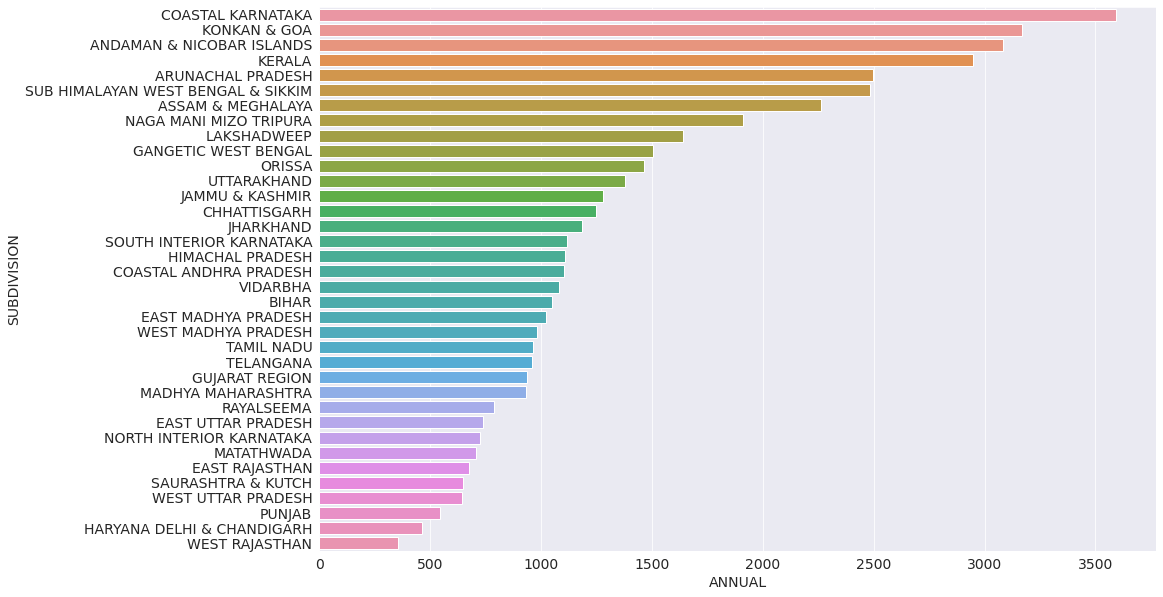

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(first_df.ANNUAL,first_df.SUBDIVISION);

The above plot shows the annual rainfall in different subdivisions of india.

2] Grouping data by YEAR , Calculating rainfall over the entire country

In [36]:
second_df=rain_df.loc[:,rain_df.columns!='SUBDIVISION'].groupby('YEAR',as_index=False).sum()
second_df=second_df.sort_values('ANNUAL',ascending=False)

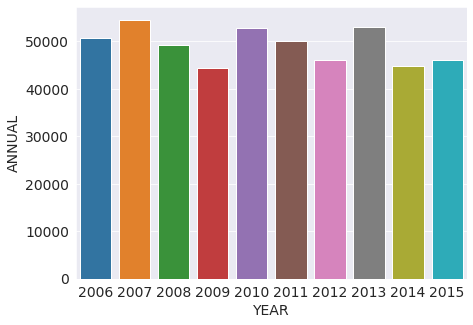

In [37]:
plt.figure(figsize=(7,5))
sns.barplot(second_df.YEAR,second_df.ANNUAL);

The above plot shows the annual rainfall in India over the years.

3] Comparing the rainfall over the two Indian islands : ANDAMAN & NICOBAR ISLANDS & LAKSHADWEEP

In [58]:
island1_df=rain_df.loc[rain_df.SUBDIVISION=='ANDAMAN & NICOBAR ISLANDS',:]

In [39]:
island2_df=rain_df.loc[rain_df.SUBDIVISION=='LAKSHADWEEP',:]

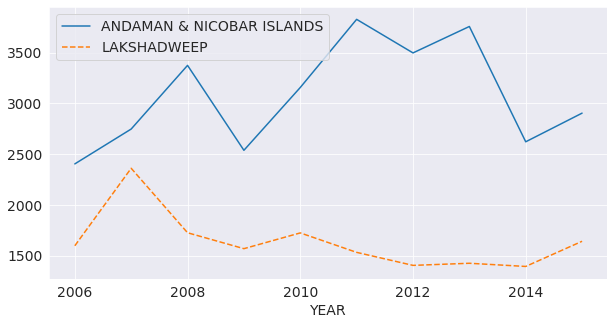

In [40]:
ax=island1_df.plot(x='YEAR', y='ANNUAL', figsize=(10,5), grid=True)
island2_df.plot(ax=ax, x='YEAR', y='ANNUAL', figsize=(10,5), grid=True,linestyle="--")
ax.legend(["ANDAMAN & NICOBAR ISLANDS", "LAKSHADWEEP"]);

The above plot compares the rainfall in the two Indian islands. 

Clearly, we can see that Andaman & Nicobar islands receive more rainfall than Lakshadweep island.

4] Comparing the rainfall over the country throughout different months over the years

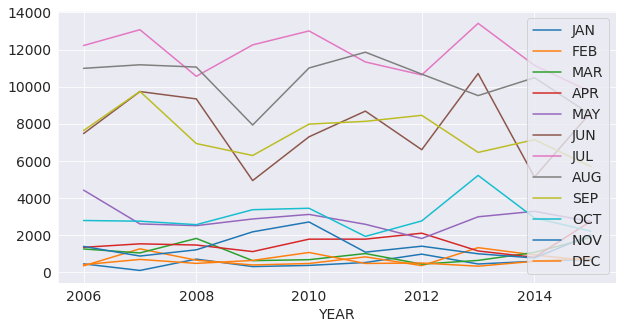

In [41]:
rain_df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(10,5));


The above plot compares the rainfall over India in different months over the years.

Clearly, the month of July receives the highest rainfall.

5] Comparing the rainfall over the country by grouping months over the years

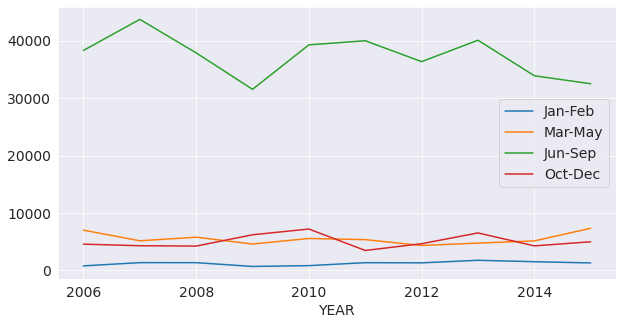

In [42]:
rain_sec_df[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(10,5));

6] Comparing rainfall between the states of highest rainfall and lowest rainfall : COASTAL KARNATAKA & WEST RAJASTHAN

In [43]:
highest_rainfall_df=rain_df.loc[rain_df.SUBDIVISION=='COASTAL KARNATAKA',:]
lowest_rainfall_df=rain_df.loc[rain_df.SUBDIVISION=='WEST RAJASTHAN',:]

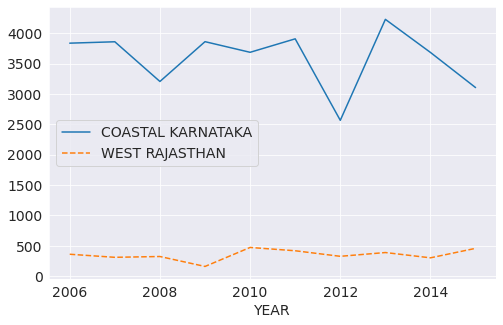

In [44]:
ax=highest_rainfall_df.plot(x='YEAR', y='ANNUAL', figsize=(8,5), grid=True)
lowest_rainfall_df.plot(ax=ax, x='YEAR', y='ANNUAL', figsize=(8,5), grid=True,linestyle="--")
ax.legend(["COASTAL KARNATAKA", "WEST RAJASTHAN"]);

7] Understanding the rainfall pattern in the subdivision receiving highest rainfall using a heatmap.

In [45]:
highest_rainfall_subd_df=rain_df.loc[rain_df.SUBDIVISION=='COASTAL KARNATAKA',:]
highest_rainfall_subd_df=highest_rainfall_subd_df.drop(['SUBDIVISION'], axis=1)
highest_rainfall_subd_df.reset_index(drop=True, inplace=True)

<AxesSubplot:>

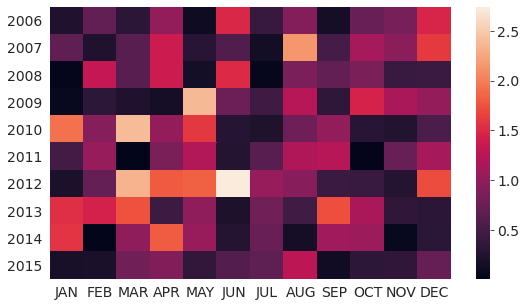

In [46]:
index=list([2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])
cols = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
highest_rainfall_subd_df = pd.DataFrame(abs(np.random.randn(10,12)),index=index, columns=cols)
highest_rainfall_subd_df.style.background_gradient(cmap='Blues')
sns.heatmap(highest_rainfall_subd_df, annot=False)

Let us save and upload our work to Jovian before continuing

In [47]:
import jovian

In [48]:
jovian.commit(project=project_name, files=["rainfall_in_india_1901-2015.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "chaudhari90009/rainfall-in-india-2005-2015" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/chaudhari90009/rainfall-in-india-2005-2015


'https://jovian.ml/chaudhari90009/rainfall-in-india-2005-2015'

## Asking and Answering Questions

Some interesting questions to understand and analyse the data more clearly.



Q1] Which 5 subdivisions receive the highest annual rainfall?


In [49]:
first_df.head(5)

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
6,COASTAL KARNATAKA,2.92,5.13,27.24,45.05,116.68,780.04,1120.88,811.12,436.29,203.24,88.87,12.96,3594.765
17,KONKAN & GOA,0.85,1.08,8.05,1.36,32.34,695.28,1096.14,712.59,446.36,143.77,30.99,1.71,3170.560
0,ANDAMAN & NICOBAR ISLANDS,77.89,28.22,56.44,94.62,380.86,466.59,423.81,403.17,500.87,303.55,219.88,127.48,3083.360
16,KERALA,7.08,15.18,57.22,121.55,196.89,604.34,664.27,424.66,349.32,306.18,167.57,32.42,2946.570
1,ARUNACHAL PRADESH,28.08,62.38,114.55,248.02,254.04,452.11,452.88,374.22,362.38,103.99,29.39,15.73,2497.790


Q2] Which 5 subdivisions receive the lowest annual rainfall?

In [50]:
first_df.tail(5)

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
26,SAURASHTRA & KUTCH,0.31,0.36,0.67,1.18,0.34,72.15,231.88,174.57,153.11,6.45,7.10,0.93,649.09
35,WEST UTTAR PRADESH,12.32,20.13,15.72,5.34,14.31,84.29,199.62,173.90,93.58,17.15,3.57,4.10,644.09
24,PUNJAB,15.63,24.51,22.72,15.23,15.18,70.93,128.46,146.81,87.36,7.72,2.77,7.80,545.12
12,HARYANA DELHI & CHANDIGARH,6.95,19.56,18.82,9.48,19.63,60.33,108.94,116.63,93.03,4.34,1.64,3.58,462.92
34,WEST RAJASTHAN,1.77,7.63,8.63,7.38,10.58,34.41,97.16,119.86,59.15,2.06,2.24,1.76,352.60


Q3] In which year did India receive highest annual rainfall?

In [51]:
second_df.sort_values('ANNUAL',ascending=False)
second_df.head(1)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
1,2007,87.7,1253.9,1031.5,1522.6,2596.2,9734.4,13069.8,11178.0,9742.0,2743.8,864.1,682.3,54506.4


Q4] Which month received the maximum rainfall in India over the years?

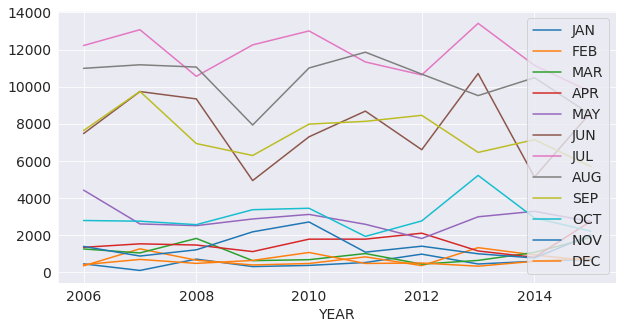

In [52]:
rain_df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(10,5));


Q5] Which subdivisions receive above average rainfall?

In [53]:
a=first_df['ANNUAL'].mean()

In [54]:
first_df.loc[first_df.ANNUAL>a,:]

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
6,COASTAL KARNATAKA,2.92,5.13,27.24,45.05,116.68,780.04,1120.88,811.12,436.29,203.24,88.87,12.96,3594.765
17,KONKAN & GOA,0.85,1.08,8.05,1.36,32.34,695.28,1096.14,712.59,446.36,143.77,30.99,1.71,3170.560
0,ANDAMAN & NICOBAR ISLANDS,77.89,28.22,56.44,94.62,380.86,466.59,423.81,403.17,500.87,303.55,219.88,127.48,3083.360
16,KERALA,7.08,15.18,57.22,121.55,196.89,604.34,664.27,424.66,349.32,306.18,167.57,32.42,2946.570
1,ARUNACHAL PRADESH,28.08,62.38,114.55,248.02,254.04,452.11,452.88,374.22,362.38,103.99,29.39,15.73,2497.790
28,SUB HIMALAYAN WEST BENGAL & SIKKIM,9.13,27.91,55.01,131.94,266.15,484.68,552.68,478.26,352.02,104.78,14.74,5.30,2482.600
2,ASSAM & MEGHALAYA,8.31,21.55,54.49,187.85,285.04,450.78,425.00,390.41,308.77,110.13,14.26,5.13,2261.700
21,NAGA MANI MIZO TRIPURA,9.31,14.67,33.55,132.90,260.13,343.20,332.02,345.62,276.77,136.69,17.75,6.06,1908.650
18,LAKSHADWEEP,15.75,7.94,20.55,36.20,132.28,328.25,281.84,257.42,209.91,154.16,120.66,73.61,1638.570
10,GANGETIC WEST BENGAL,11.62,15.90,17.62,42.94,122.51,237.61,363.89,308.50,278.56,89.52,9.69,6.34,1504.720


Q6] Which subdivisions receive below average rainfall?

In [55]:
first_df.loc[first_df.ANNUAL<a,:]

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
14,JAMMU & KASHMIR,86.75,129.49,114.40,79.69,61.13,81.69,167.05,192.30,110.91,31.21,22.58,52.20,1278.005
4,CHHATTISGARH,7.63,9.65,10.91,19.76,13.71,169.28,375.46,345.14,230.43,50.15,10.49,4.11,1246.700
15,JHARKHAND,8.45,13.61,11.10,17.05,58.60,181.99,312.33,289.97,216.49,64.53,7.35,3.21,1184.700
27,SOUTH INTERIOR KARNATAKA,1.84,5.35,25.24,52.69,94.68,154.15,229.52,204.84,158.02,112.94,69.71,8.30,1117.280
13,HIMACHAL PRADESH,66.69,97.77,88.15,54.25,48.65,112.23,215.39,241.33,114.92,18.49,17.62,31.94,1107.400
5,COASTAL ANDHRA PRADESH,6.70,11.83,15.31,27.88,61.29,141.98,178.42,206.23,191.49,158.27,90.47,15.74,1105.580
32,VIDARBHA,5.16,4.24,19.94,6.67,5.09,168.05,336.46,294.29,187.12,38.37,13.08,0.70,1079.190
3,BIHAR,8.35,10.84,8.45,17.53,68.56,153.80,291.61,256.37,181.78,48.44,3.10,1.41,1050.230
7,EAST MADHYA PRADESH,13.75,14.85,17.59,7.16,4.99,147.56,325.50,288.76,148.07,35.67,13.56,4.47,1021.900
33,WEST MADHYA PRADESH,8.35,9.05,11.70,2.80,5.86,122.57,340.18,299.72,145.82,21.91,9.99,4.27,982.270


Let us save and upload our work to Jovian before continuing.

In [56]:
import jovian

In [57]:
jovian.commit(project=project_name, files=["rainfall_in_india_1901-2015.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "chaudhari90009/rainfall-in-india-2005-2015" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/chaudhari90009/rainfall-in-india-2005-2015


'https://jovian.ml/chaudhari90009/rainfall-in-india-2005-2015'

## Inferences and Conclusion
This detailed analysis points out various patterns in rainfall over the country for a range of 10 years. <br>
Some of the inferences are: <br>
-July is the month receiving the highest rainfall over the years. <br>
-The year 2007 received the highest rainfall over the span of 10 years. <br>
-There are more subdivisions receiving below average rainfall than those receiving above average rainfall. <br>
-We observed the pattern of how rainfall varies over various months and years. <br>
-This analysis includes the comparison of rainfall between the two Indian islands: Andaman & Nicobar islands receive more rainfall than Lakshadweep islands. <br>
-Some areas receive extremely low rainfall and should be a matter of concern. <br>







In [68]:
import jovian

In [ ]:
jovian.commit(project=project_name, files=["rainfall_in_india_1901-2015.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..


## References 
The dataset used is accessed from kaggle :https://www.kaggle.com/rajanand/rainfall-in-india     <br>                        JovianML- Data Analysis with Python: Zero to Pandas




In [20]:
import jovian

In [21]:
jovian.commit(project=project_name, files=["rainfall_in_india_1901-2015.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "chaudhari90009/rainfall-in-india-2005-2015" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/chaudhari90009/rainfall-in-india-2005-2015


'https://jovian.ml/chaudhari90009/rainfall-in-india-2005-2015'